---- Gursimranjeet Singh

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('all_month.csv')

In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-12-17T14:52:34.100Z,33.6765,-116.778667,16.45,0.84,ml,31.0,77.0,0.06393,0.14,...,2024-12-17T14:57:27.120Z,"9 km SW of Idyllwild, CA",earthquake,0.19,0.36,0.164000,30.0,automatic,ci,ci
1,2024-12-17T14:17:19.261Z,63.6035,-147.841300,2.80,2.10,ml,NaN,NaN,NaN,0.92,...,2024-12-17T14:19:43.610Z,"55 km ESE of Denali Park, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
2,2024-12-17T14:03:19.731Z,60.9416,-151.182600,59.10,2.00,ml,NaN,NaN,NaN,0.40,...,2024-12-17T14:05:13.048Z,"14 km S of Tyonek, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
3,2024-12-17T14:02:39.560Z,60.3169,-148.805500,66.10,2.60,ml,NaN,NaN,NaN,1.51,...,2024-12-17T14:04:57.220Z,"29 km E of Primrose, Alaska",earthquake,NaN,3.80,NaN,NaN,automatic,ak,ak
4,2024-12-17T13:50:47.950Z,38.5090,-112.904000,3.48,0.76,md,12.0,113.0,0.01550,0.07,...,2024-12-17T14:37:24.670Z,"15 km NE of Milford, Utah",earthquake,0.34,0.54,0.255891,5.0,reviewed,uu,uu


In [6]:
df.shape

(10270, 22)

In [7]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,10270.000000,10270.000000,10270.000000,10268.000000,8762.000000,8761.000000,8732.000000,10267.000000,7807.000000,10268.000000,8703.000000,8758.000000
mean,39.176730,-116.472690,19.357575,1.543359,22.971239,122.302071,0.388697,0.242108,1.643088,2.517184,0.191655,15.714204
std,17.373046,57.939509,47.797191,1.275299,21.582852,71.216423,1.631104,0.260357,3.005880,7.253072,0.131506,23.932344
min,-62.134000,-179.949500,-3.490000,-2.090000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.698333,-150.896850,2.420000,0.770000,9.000000,68.640000,0.014175,0.090000,0.270000,0.470000,0.110000,6.000000
50%,38.824665,-122.438333,7.358000,1.400000,16.000000,103.000000,0.054870,0.150000,0.440000,0.800000,0.170000,10.000000
75%,50.858050,-115.451042,14.477500,2.090000,29.000000,158.000000,0.142350,0.280000,0.980000,1.800000,0.238029,18.000000
max,81.929300,179.895800,625.963000,7.300000,325.000000,358.000000,42.185000,2.610000,24.740000,322.400000,1.990000,516.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10270 entries, 0 to 10269
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10270 non-null  object 
 1   latitude         10270 non-null  float64
 2   longitude        10270 non-null  float64
 3   depth            10270 non-null  float64
 4   mag              10268 non-null  float64
 5   magType          10268 non-null  object 
 6   nst              8762 non-null   float64
 7   gap              8761 non-null   float64
 8   dmin             8732 non-null   float64
 9   rms              10267 non-null  float64
 10  net              10270 non-null  object 
 11  id               10270 non-null  object 
 12  updated          10270 non-null  object 
 13  place            10270 non-null  object 
 14  type             10270 non-null  object 
 15  horizontalError  7807 non-null   float64
 16  depthError       10268 non-null  float64
 17  magError    

In [9]:
df.isnull().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,2
magType,2
nst,1508
gap,1509
dmin,1538
rms,3


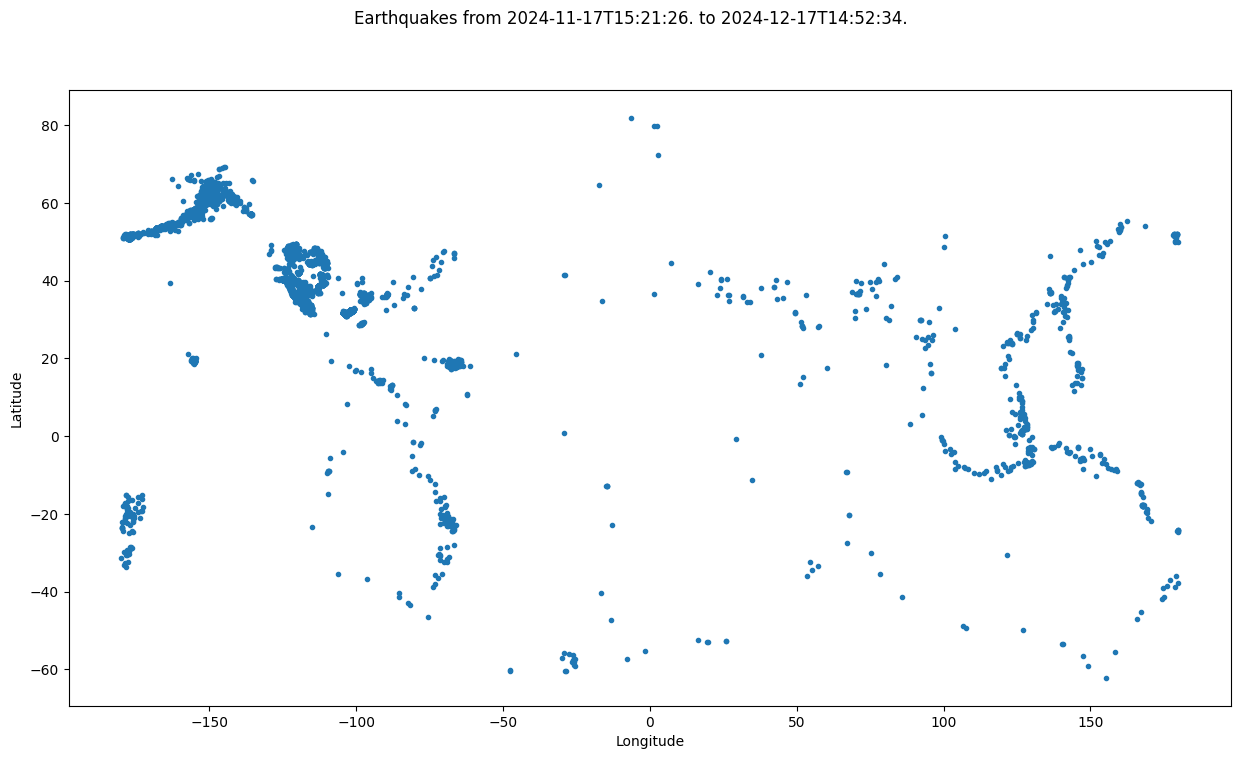

In [10]:
rounding_factor = 10
fig, ax = plt.subplots(figsize=(15,8))

#  top 10500 samples.
plt.plot(np.round(df['longitude'].head(10500),rounding_factor),
         np.round(df['latitude'].head(10500),rounding_factor),
         linestyle='none', marker='.')

plt.suptitle('Earthquakes from ' + str(np.min(df['time']))[:20] + ' to ' + str(np.max(df['time']))[:20])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
df = df.sort_values('time', ascending=True)

#Date extraction
df['date'] = df['time'].str[0:10]
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
10269,2024-11-17T15:21:26.680Z,38.687167,-122.500000,7.360,1.08,md,28.0,57.0,0.069270,0.07,...,"12 km SE of Middletown, CA",earthquake,0.14,0.460,0.137000,20.0,reviewed,nc,nc,2024-11-17
10268,2024-11-17T15:22:10.880Z,35.518333,-96.797167,1.010,-0.62,ml,8.0,280.0,0.020696,0.04,...,"9 km E of Meeker, Oklahoma",earthquake,NaN,0.200,0.000000,1.0,reviewed,ok,ok,2024-11-17
10267,2024-11-17T15:22:11.669Z,35.509500,-96.797333,1.290,-0.50,ml,8.0,300.0,0.019796,0.08,...,"9 km E of Meeker, Oklahoma",earthquake,NaN,0.500,0.000000,1.0,reviewed,ok,ok,2024-11-17
10266,2024-11-17T15:23:05.660Z,44.535000,-115.217667,5.760,1.82,ml,14.0,68.0,0.504700,0.08,...,"41 km NNW of Stanley, Idaho",earthquake,0.25,0.680,0.194127,13.0,reviewed,mb,mb,2024-11-17
10265,2024-11-17T15:42:24.460Z,-24.365100,179.895800,514.594,4.20,mb,29.0,100.0,5.234000,1.14,...,south of the Fiji Islands,earthquake,6.56,11.162,0.110000,23.0,reviewed,us,us,2024-11-17


In [13]:
# only keep the columns needed
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]
# df['date'] = df['time'].str.split(', ', expand=True)
newdf = df['place'].str.split(', ', expand=True)

In [14]:
newdf.head()

,0,1,2
10269,12 km SE of Middletown,CA,None
10268,9 km E of Meeker,Oklahoma,None
10267,9 km E of Meeker,Oklahoma,None
10266,41 km NNW of Stanley,Idaho,None
10265,south of the Fiji Islands,None,None


In [15]:
df['place'] = newdf[1]
df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

In [16]:
df.head()

,date,latitude,longitude,depth,mag,place
10269,2024-11-17,38.687167,-122.500000,7.360,1.08,CA
10268,2024-11-17,35.518333,-96.797167,1.010,-0.62,Oklahoma
10267,2024-11-17,35.509500,-96.797333,1.290,-0.50,Oklahoma
10266,2024-11-17,44.535000,-115.217667,5.760,1.82,Idaho
10265,2024-11-17,-24.365100,179.895800,514.594,4.20,None


In [17]:
print('total locations:',len(set(df['place'])))

total locations: 102


Bar plot of mean magnitude vs place, as we can see from the graph, only few countries are considered as epicenter or dangerous since they have magnitude more than 2.8

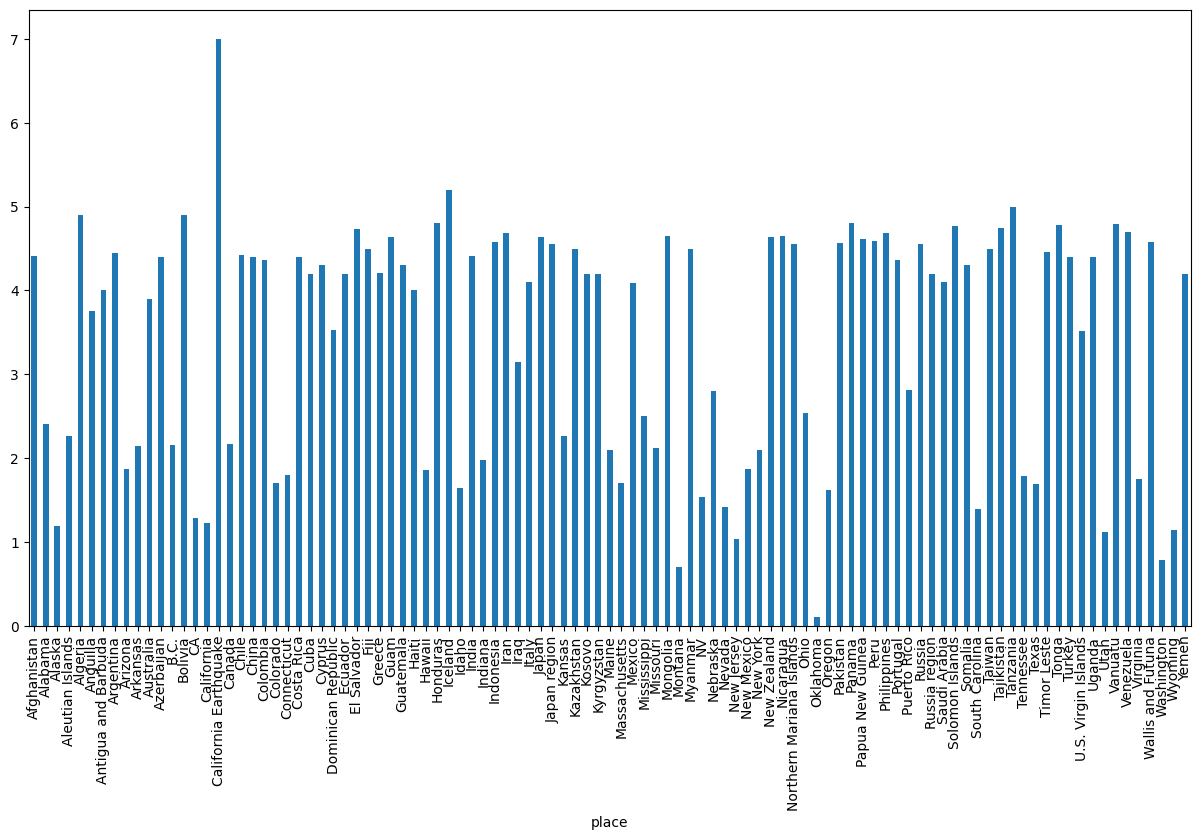

In [18]:
df.groupby(['place'])['mag'].mean().plot(kind='bar',figsize=(15,8));

<Axes: xlabel='place'>

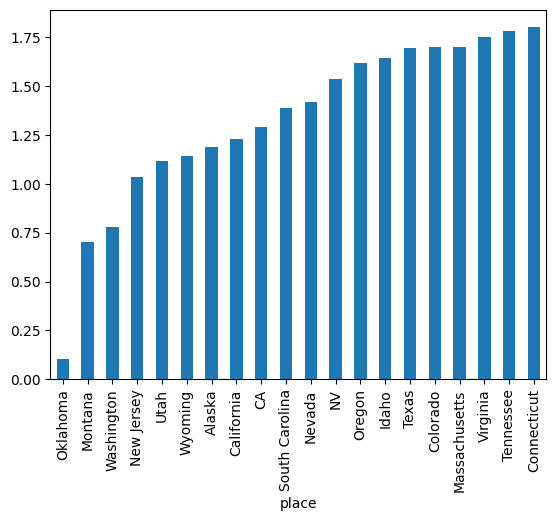

In [19]:
df.groupby(['place'])['mag'].mean().nsmallest(20).plot(kind='bar')

<Axes: xlabel='place'>

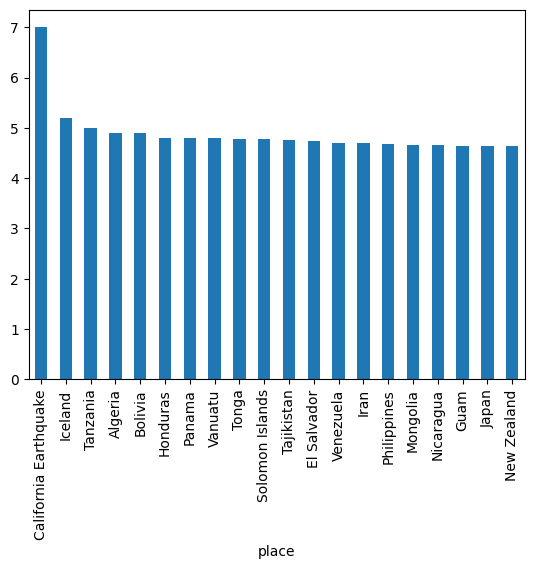

In [20]:
df.groupby(['place'])['mag'].mean().nlargest(20).plot(kind='bar')

**3 as threshold for how high the earthquake has hit and  countries with more than 3 magnitude**

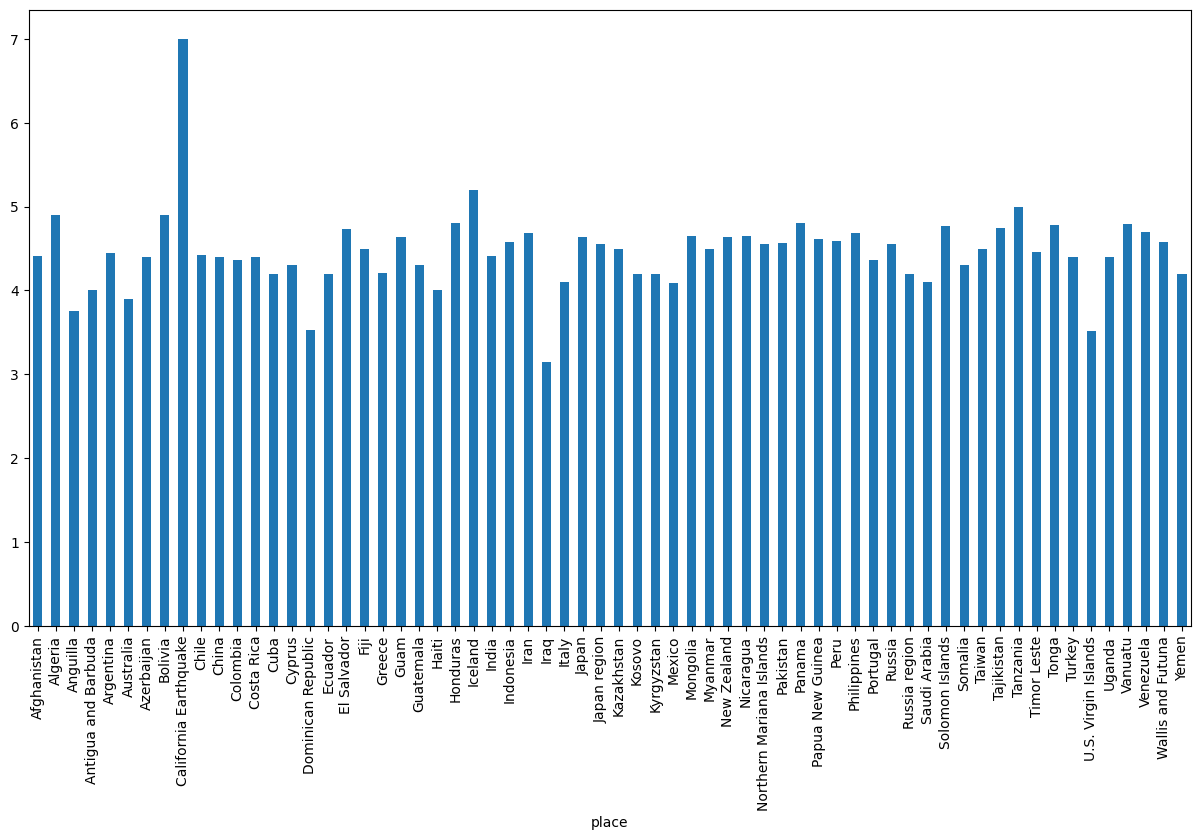

In [22]:
more_dangerous_places=df.groupby('place')['mag'].mean()
more_dangerous_places=more_dangerous_places[more_dangerous_places>3]
more_dangerous_places.plot(kind='bar',figsize= (15,8));

In [23]:
#  mean latitude and longitude for simplified locations

df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place', 'latitude', 'longitude']]

In [24]:
df_coords.head()

,place,latitude,longitude
0,Afghanistan,36.658288,70.603950
1,Alabama,33.842167,-87.127167
2,Alaska,59.222540,-154.548018
3,Aleutian Islands,51.431073,178.739430
4,Algeria,36.534700,1.431900


Merge the two dataframes - mean latitude and longitude locations calculated above with dataframe only considering ['date' , 'depth', 'mag', 'place'] as columns out of total features

In [25]:
df = df[['date', 'depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df.head()

print('total locations:',len(set(df['place'])))

total locations: 101


In [26]:
print(set(df['place']))

{'Cyprus', 'Indiana', 'Dominican Republic', 'Vanuatu', 'California Earthquake', 'Japan', 'New Jersey', 'Australia', 'Connecticut', 'Italy', 'Kyrgyzstan', 'Costa Rica', 'Nevada', 'Montana', 'Arizona', 'B.C.', 'Turkey', 'Utah', 'Argentina', 'Kansas', 'Russia', 'Afghanistan', 'Oregon', 'California', 'Maine', 'Bolivia', 'Aleutian Islands', 'Massachusetts', 'Greece', 'Ohio', 'Papua New Guinea', 'Philippines', 'Saudi Arabia', 'Peru', 'Iceland', 'Canada', 'Mongolia', 'Tanzania', 'Somalia', 'Alabama', 'NV', 'Cuba', 'Washington', 'Texas', 'China', 'Hawaii', 'Virginia', 'Kazakhstan', 'Northern Mariana Islands', 'New Zealand', 'Wyoming', 'Myanmar', 'Mexico', 'U.S. Virgin Islands', 'Uganda', 'Mississippi', 'Nebraska', 'Nicaragua', 'Anguilla', 'Wallis and Futuna', 'Portugal', 'Iran', 'CA', 'Japan region', 'Colombia', 'Missouri', 'Honduras', 'Chile', 'Guatemala', 'Colorado', 'Guam', 'Kosovo', 'Haiti', 'Arkansas', 'India', 'Antigua and Barbuda', 'Russia region', 'New Mexico', 'Azerbaijan', 'Alaska', 

In [27]:
df.head()

,date,depth,mag,place,latitude,longitude
0,2024-11-17,7.36,1.08,CA,37.078651,-120.585821
1,2024-11-17,1.01,-0.62,Oklahoma,35.663272,-97.037278
2,2024-11-17,1.29,-0.50,Oklahoma,35.663272,-97.037278
3,2024-11-17,5.76,1.82,Idaho,44.609825,-114.705905
4,2024-11-17,86.40,3.20,Alaska,59.222540,-154.548018


**Feature Engineering and Data wrangling**

Set rolling window size for future prediction based on past values with fixed window size in past
I have created 6 new features based on rolling window size on average depth and average magnitude.
A final outcome 'mag_outcome' has been defined as target values and the output is considered as shifted values from set rolling window of past days eg: '7'.

In [28]:
eq_tmp = df.copy()

#rolling window size
DAYS_OUT_TO_PREDICT = 7

# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()

    #avg. depth of 22 days rolling period and so on..
    temp_df['depth_avg_22'] = temp_df['depth'].rolling(window=22,center=False).mean()
    temp_df['depth_avg_15'] = temp_df['depth'].rolling(window=15,center=False).mean()
    temp_df['depth_avg_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['mag_avg_22'] = temp_df['mag'].rolling(window=22,center=False).mean()
    temp_df['mag_avg_15'] = temp_df['mag'].rolling(window=15,center=False).mean()
    temp_df['mag_avg_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'mag_avg_7'].shift(DAYS_OUT_TO_PREDICT * -1)

    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)

    eq_data_last_days_out.append(temp_df.tail(DAYS_OUT_TO_PREDICT))

    eq_data.append(temp_df)

In [29]:
# concat all location-based dataframes into master dataframe
eq_all = pd.concat(eq_data)

In [30]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
4615,2024-12-02,10.000,4.10,Cyprus,34.574450,33.595300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5816,2024-12-05,36.447,4.50,Cyprus,34.574450,33.595300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3320,2024-11-29,6.830,1.98,Indiana,39.673500,-87.406000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,2024-11-17,24.990,3.32,Dominican Republic,18.707619,-68.535946,NaN,NaN,NaN,NaN,NaN,NaN,3.627143
522,2024-11-19,103.411,3.40,Dominican Republic,18.707619,-68.535946,NaN,NaN,NaN,NaN,NaN,NaN,3.555714


In [31]:
# remove any NaN fields
eq_all = eq_all[np.isfinite(eq_all['depth_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_avg_22'])]
eq_all = eq_all[np.isfinite(eq_all['mag_outcome'])]

In [32]:
eq_all.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
10022,2024-12-17,56.851,5.0,Vanuatu,-17.212203,168.062845,122.493591,124.826800,71.732143,4.777273,4.886667,5.271429,4.828571
2585,2024-11-27,10.000,4.4,Japan,33.418626,135.120940,65.553818,61.851133,18.815571,4.718182,4.746667,4.871429,4.342857
2604,2024-11-27,68.644,4.3,Japan,33.418626,135.120940,68.219455,62.737200,23.621857,4.700000,4.733333,4.728571,4.414286
2607,2024-11-27,10.000,4.3,Japan,33.418626,135.120940,57.354818,61.070533,23.907571,4.668182,4.700000,4.471429,4.485714
2742,2024-11-27,10.000,4.4,Japan,33.418626,135.120940,51.575182,61.070533,24.369571,4.677273,4.693333,4.457143,4.471429


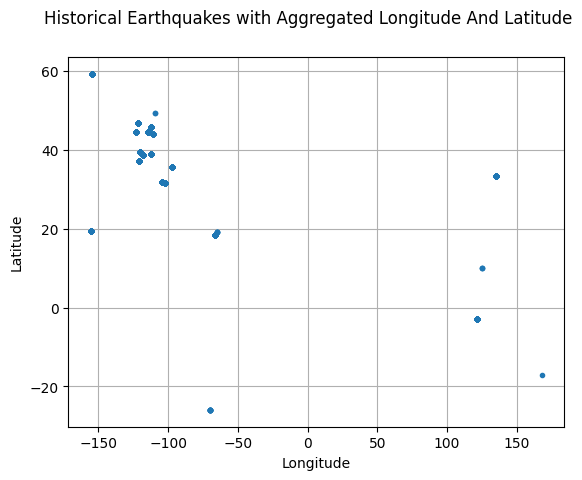

In [33]:
# location after feature engineering
plt.plot(eq_all['longitude'],
         eq_all['latitude'],
         linestyle='none', marker='.')
plt.suptitle('Historical Earthquakes with Aggregated Longitude And Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [34]:
# keep our live data for predictions
eq_data_last_days_out = pd.concat(eq_data_last_days_out)


eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['mag_avg_22'])]
predict_unknown=eq_data_last_days_out

In [35]:
# here 'mag_outcome' has NaN because these are future outcome event to be predicted live or data that has not yet been witnessed
predict_unknown

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
8542,2024-12-12,105.00,4.14,Dominican Republic,18.707619,-68.535946,74.170636,67.835933,86.217429,3.525455,3.505333,3.612857,NaN
8599,2024-12-12,59.54,3.43,Dominican Republic,18.707619,-68.535946,75.741091,67.938600,84.490286,3.530455,3.485333,3.657143,NaN
8979,2024-12-13,11.00,3.51,Dominican Republic,18.707619,-68.535946,71.540591,68.005267,68.918857,3.535455,3.526000,3.655714,NaN
9070,2024-12-14,26.60,3.30,Dominican Republic,18.707619,-68.535946,65.749682,62.577467,68.740000,3.499545,3.579333,3.541429,NaN
9520,2024-12-15,41.00,4.00,Dominican Republic,18.707619,-68.535946,61.386045,63.977467,58.795714,3.500000,3.585333,3.635714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,2024-12-15,7.83,1.88,Idaho,44.609825,-114.705905,8.209045,8.026600,8.368571,2.134091,2.249333,2.222857,NaN
9506,2024-12-15,7.21,2.97,Idaho,44.609825,-114.705905,8.208591,7.991267,8.027143,2.200455,2.315333,2.344286,NaN
9564,2024-12-15,5.63,2.00,Idaho,44.609825,-114.705905,8.449955,7.735267,8.000000,2.235455,2.314667,2.301429,NaN
9792,2024-12-16,2.53,1.48,Idaho,44.609825,-114.705905,8.386318,7.570600,7.220000,2.255909,2.246667,2.172857,NaN


considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.

In [36]:
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
print(eq_all['mag_outcome'].describe())
eq_all['mag_outcome'].value_counts()

count    9036.000000
mean        0.051239
std         0.220498
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: mag_outcome, dtype: float64


,count
mag_outcome,
0,8573
1,463


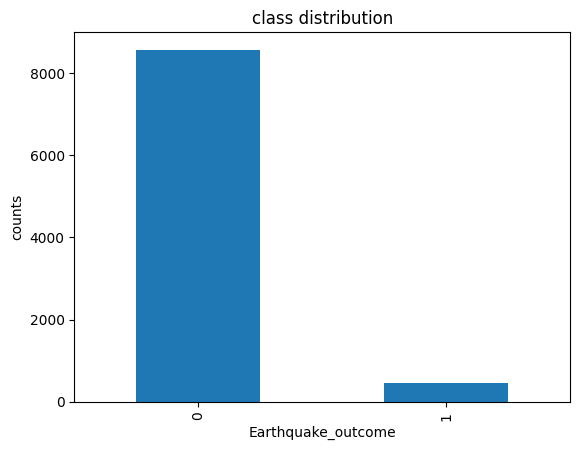

In [37]:
eq_all['mag_outcome'].value_counts().plot(kind='bar',)
plt.xlabel('Earthquake_outcome')
plt.ylabel('counts')
plt.title('class distribution');

In [38]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Earthquakedata.db')
eq_all.to_sql('Earthquake_features', engine, index=False,if_exists='replace')

9036

In [39]:
engine = create_engine('sqlite:///Earthquakedata_predict.db')
predict_unknown.to_sql('Earthquake_predict', engine, index=False,if_exists='replace')

168